In [1]:
from utils_project import *

def count_non_nan(xys):
    return np.array([np.sum(~np.isnan(xy)) for xy in xys])

def plot_self_ratings(y_vars, y_labels, pvalues=None):

    fig, axs = plt.subplots(1, 2, figsize=(11, 5))
    df = sample_dict['Validation']['data']
    colors = ['#4374B3', '#FF0B04']
    x_vars = ['self_likability', 'self_impact']

    if isinstance(y_vars, str): 
        y_vars   = [y_vars, y_vars]
        y_labels = [y_labels, y_labels]

    for i in range(2):
        ax = axs[i]

        x = scipy.stats.zscore(df[x_vars[i]])
        ax = plot_regplot(x=x, y=df[y_vars[i]], ax=ax, color=colors[i])
        ax.set_ylabel('', fontsize=12)
        if 'likability' in x_vars[i]: xlabel = 'Self-likability (z)'
        elif 'impact' in x_vars[i]:   xlabel = 'Self-impact (z)'
        ax.set_xlabel(xlabel, fontsize=12)
        if i == 0: 
            ax.set_ylabel(f'{y_labels[i]}', fontsize=label_fontsize)
        elif y_labels[0] == y_labels[1]: 
            ax.set_ylabel('')
        else:
            ax.set_ylabel(f'{y_labels[i]}', fontsize=label_fontsize)

        if pvalues is not None:
            plot_significance(ax, pvalues[i], sig_level=4, x=0.96, y=0.99, dx=-0.0275, 
                              color=colors[i], fontsize=title_fontsize)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Initial n=579
Validation n=255
Combined n=834
Questionnaire items loaded


In [2]:
# realworld relationships
cols = [c for c in get_cols('dots_affil_relationship') if 'mean' not in c] # exclue the mean column
relationship_cols = np.unique([('_').join(col.split('_')[:2]) for col in cols])
family    = ['marriage', 'dating', 'children', 'parents', 'relatives', 'inlaws']
nonfamily = ['friends', 'school', 'neighbors', 'workNonsupervision', 'workSupervision', 'religion', 'volunteer', 'extraGroup']

family_cols    = [col for col in relationship_cols if any([f in col for f in family])]
nonfamily_cols = [col for col in relationship_cols if any([f in col for f in nonfamily])]
assert len(family_cols) + len(nonfamily_cols) == len(relationship_cols)

fam_dots_xy    = reshape_dataframe(data, [[f'{rel}_dots_affil_relationship', f'{rel}_dots_power_relationship' ] for rel in family_cols])
nonfam_dots_xy = reshape_dataframe(data, [[f'{rel}_dots_affil_relationship', f'{rel}_dots_power_relationship' ] for rel in nonfamily_cols])
rw_dots_xy     = reshape_dataframe(data, [[f'{rel}_dots_affil_relationship', f'{rel}_dots_power_relationship' ] for rel in relationship_cols])

fam_ratings_xy    = (reshape_dataframe(data, [[f'{rel}_likability_relationship', f'{rel}_impact_relationship' ] for rel in family_cols]) - 50) / 50
nonfam_ratings_xy = (reshape_dataframe(data, [[f'{rel}_likability_relationship', f'{rel}_impact_relationship' ] for rel in nonfamily_cols]) - 50) / 50
rw_ratings_xy     = (reshape_dataframe(data, [[f'{rel}_likability_relationship', f'{rel}_impact_relationship' ] for rel in relationship_cols]) - 50) / 50

data[['dots_affil_family_mean', 'dots_power_family_mean']] = np.nanmean(fam_dots_xy, axis=1)
data[['dots_affil_nonfamily_mean', 'dots_power_nonfamily_mean']] = np.nanmean(nonfam_dots_xy, axis=1)
data[['likability_family_mean', 'impact_family_mean']] = np.nanmean(fam_ratings_xy, axis=1)
data[['likability_nonfamily_mean', 'impact_nonfamily_mean']] = np.nanmean(nonfam_ratings_xy, axis=1)

# this is in the validation sample only
self_ratings   = data[['self_likability', 'self_impact']]
ratings        = data[['likability_mean', 'impact_mean']]
fam_ratings    = data[['likability_family_mean', 'impact_family_mean']]
fam_dots       = data[['dots_affil_family_mean', 'dots_power_family_mean']]
nonfam_ratings = data[['likability_nonfamily_mean', 'impact_nonfamily_mean']]
nonfam_dots    = data[['dots_affil_nonfamily_mean', 'dots_power_nonfamily_mean']]

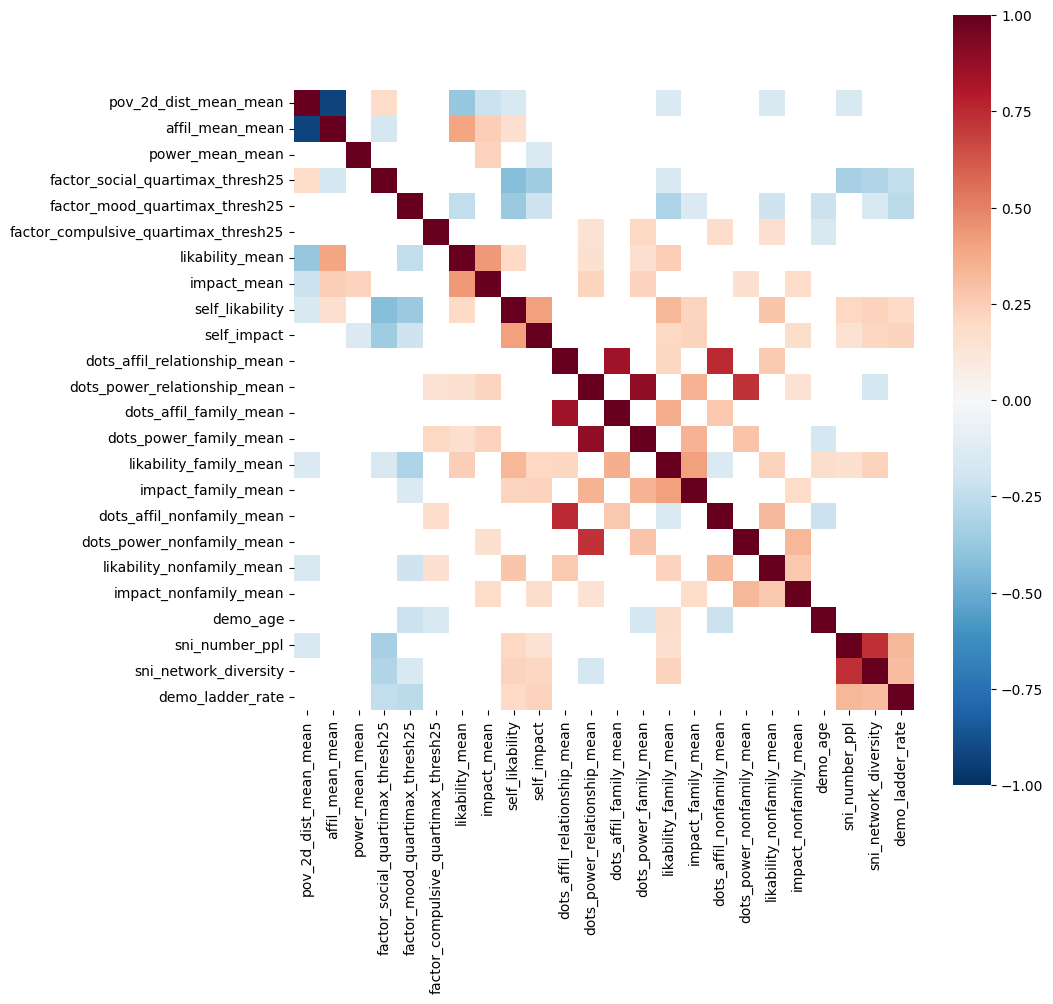

In [5]:
data_   = sample_dict['Combined']['data']
corrmat = data_[['pov_2d_dist_mean_mean', 
                 'affil_mean_mean', 'power_mean_mean', 
                 social_factor, mood_factor, compulsive_factor,
                 'likability_mean', 'impact_mean',
                 'self_likability', 'self_impact',
                  'dots_affil_relationship_mean', 'dots_power_relationship_mean', 
                  'dots_affil_family_mean', 'dots_power_family_mean', 
                   'likability_family_mean', 'impact_family_mean',
                   'dots_affil_nonfamily_mean', 'dots_power_nonfamily_mean',
                   'likability_nonfamily_mean', 'impact_nonfamily_mean',
                #    'zbpd_score', 'apdis_score', 'lsas_av_score', 'bapq_score',
                   'demo_age',
                   'sni_number_ppl', 'sni_network_diversity', 'demo_ladder_rate',
                  ]].corr()

fig, ax = plt.subplots(figsize=(10, 10))
corrmat[np.abs(corrmat) < .15] = np.nan
sns.heatmap(corrmat, annot=False, square=True, cmap="RdBu_r", vmin=-1, vmax=1, ax=ax)
ax.set_aspect('equal')
plt.show()

# No strong simple correlations between social factor & relationship dimensions

In [6]:
# display(run_ols(X=['impact_nonfamily_mean', 'likability_nonfamily_mean'], y=social_factor, data=data)[0].iloc[1:,:])
# display(run_ols(X=['impact_family_mean', 'likability_family_mean'], y=social_factor, data=data)[0].iloc[1:,:])
display(run_ols(X=['dots_power_nonfamily_mean', 'dots_affil_nonfamily_mean'], y=social_factor, covariates=all_controls, data=data)[0].iloc[1:3,:])
display(run_ols(X=['dots_power_family_mean', 'dots_affil_family_mean'], y=social_factor, covariates=all_controls, data=data)[0].iloc[1:3,:])

,X,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,z,p,p_left,p_right
1,Intercept + dots_power_nonfamily_mean + dots_a...,factor_social_quartimax_thresh25,dots_power_nonfamily_mean,139.0,0.019,556.68,482.43,-0.0797,0.0809,-0.2396,0.0801,-0.9859,0.9824,0.3259,0.1630,0.8370
2,Intercept + dots_power_nonfamily_mean + dots_a...,factor_social_quartimax_thresh25,dots_affil_nonfamily_mean,139.0,0.019,556.68,482.43,0.0532,0.0872,-0.1192,0.2256,0.6098,0.6083,0.5430,0.7285,0.2715


,X,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,z,p,p_left,p_right
1,Intercept + dots_power_family_mean + dots_affi...,factor_social_quartimax_thresh25,dots_power_family_mean,196.0,-0.01,731.66,650.21,-0.0181,0.0724,-0.1608,0.1246,-0.2506,0.2502,0.8024,0.4012,0.5988
2,Intercept + dots_power_family_mean + dots_affi...,factor_social_quartimax_thresh25,dots_affil_family_mean,196.0,-0.01,731.66,650.21,0.0863,0.0725,-0.0567,0.2293,1.1898,1.1862,0.2356,0.8822,0.1178


# Self-perception of likability and impact

### It correlates w/ social avoidance

These questions are informative for affiliation & power behavior; maybe theyre also informative for self-perception?

Insights: 
- People who think of themselves as likable as think of themselves as impactful
- Very few people think of themselves as impactful but not likable: is this self-delusion, or the fact that people may interact with them this way whatever their real feelings? 

,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,z,p,p_left,p_right
1,factor_social_quartimax_thresh25,self_likability,231.0,0.208,772.92,687.93,-0.3475,0.0637,-0.4730,-0.2220,-5.4568,5.2866,0.0000,0.0000,1.0000
2,factor_social_quartimax_thresh25,self_impact,231.0,0.208,772.92,687.93,-0.2133,0.0648,-0.3409,-0.0857,-3.2929,3.2517,0.0011,0.0006,0.9994


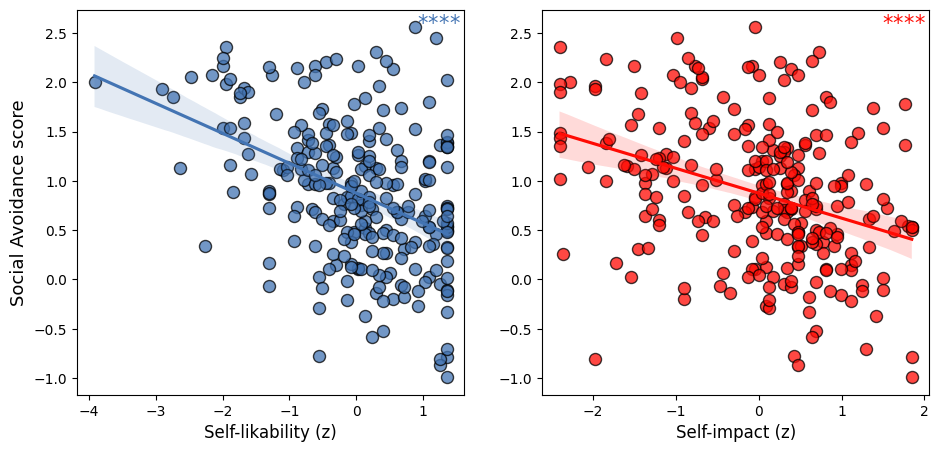

In [3]:
display(run_ols(X=['self_likability', 'self_impact'], y=social_factor, covariates=all_controls, 
                data=sample_dict['Validation']['data'])[0].iloc[1:3,1:].round(4))
plot_self_ratings(social_factor, 'Social Avoidance score', pvalues=[0.0001, 0.0001]);

# display(run_ols(X=['self_likability', 'self_impact'], y='pov_2d_dist_mean_mean', data=sample_dict['Validation']['data'])[0].round(4))
# plot_self_ratings('pov_2d_dist_mean_mean', 'Social Avoidance score', pvalues=[0.0001, 0.0001]);

In [4]:
display(run_ols(X=['self_likability'], y='affil_mean_mean', covariates=all_controls, 
                data=sample_dict['Validation']['data'])[0].iloc[1:2,1:].round(4))
display(run_ols(X=['self_impact'], y='power_mean_mean', covariates=all_controls, 
                data=sample_dict['Validation']['data'])[0].iloc[1:2,1:].round(4))

,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,z,p,p_left,p_right
1,affil_mean_mean,self_likability,232.0,0.063,811.41,729.96,0.1889,0.0635,0.0638,0.3139,2.9752,2.9442,0.0032,0.9984,0.0016


,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,z,p,p_left,p_right
1,power_mean_mean,self_impact,232.0,0.073,808.8,727.35,-0.124,0.0642,-0.2506,0.0025,-1.931,1.9212,0.0547,0.0274,0.9726


### It also correlates w/ task behavior

,X,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,p,p_left,p_right
1,Intercept + self_likability + self_impact,affil_mean_mean,self_likability,252.0,0.025,9.60,-1.02,0.033,0.016,0.001,0.065,2.007,0.046,0.977,0.023
2,Intercept + self_likability + self_impact,affil_mean_mean,self_impact,252.0,0.025,9.60,-1.02,0.018,0.016,-0.014,0.050,1.097,0.274,0.863,0.137
1,Intercept + self_likability + self_impact,power_mean_mean,self_likability,252.0,0.021,74.18,63.56,-0.020,0.019,-0.057,0.017,-1.073,0.284,0.142,0.858
2,Intercept + self_likability + self_impact,power_mean_mean,self_impact,252.0,0.021,74.18,63.56,-0.035,0.019,-0.072,0.002,-1.861,0.064,0.032,0.968
1,Intercept + self_likability + self_impact,pov_2d_dist_mean_mean,self_likability,252.0,0.027,641.98,631.36,-0.104,0.057,-0.216,0.008,-1.823,0.069,0.035,0.965
2,Intercept + self_likability + self_impact,pov_2d_dist_mean_mean,self_impact,252.0,0.027,641.98,631.36,-0.082,0.057,-0.194,0.030,-1.450,0.148,0.074,0.926


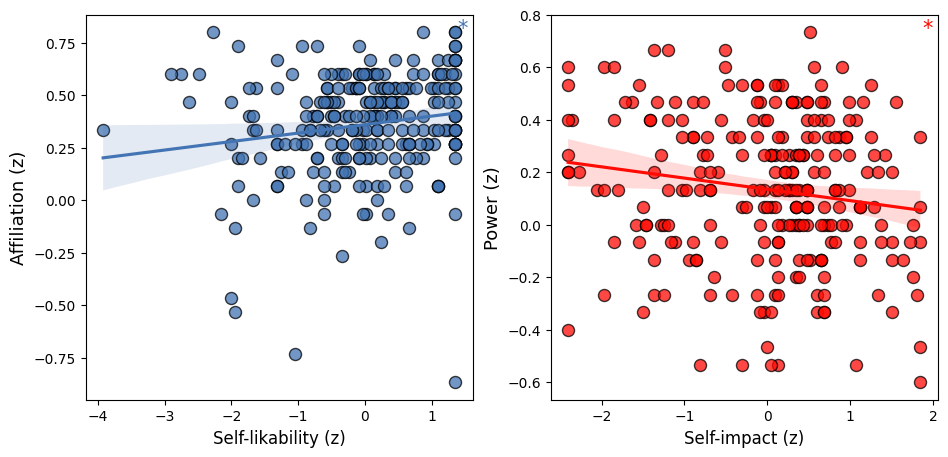

In [12]:
pd.set_option('display.precision', 3)
ratings  = [['self_likability', 'self_impact']]
yvars    = ['affil_mean_mean', 'power_mean_mean', 'pov_2d_dist_mean_mean']
ols_res  = []
for rating, yvar in itertools.product(ratings, yvars):
    ols_df = run_ols(X=rating, y=yvar, data=sample_dict['Validation']['data'])[0]
    ols_df = ols_df[ols_df['x'].isin(rating)]
    ols_res.append(ols_df)
display(pd.concat(ols_res).round(3))

plot_self_ratings(['affil_mean_mean','power_mean_mean'], ['Affiliation (z)', 'Power (z)'], pvalues=[0.023, 0.034])

Own place low affil, low power push characters into 2nd quadrant behaviorally low affil, high power
- people who view themselves as low-affil, low-power behave low-affil, low-power

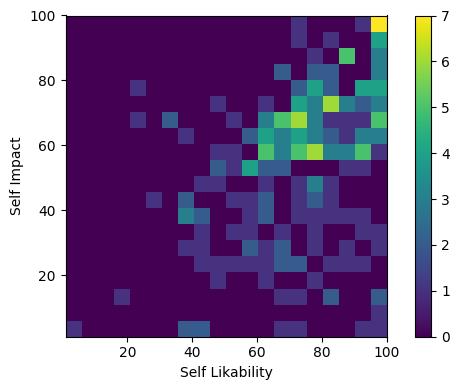

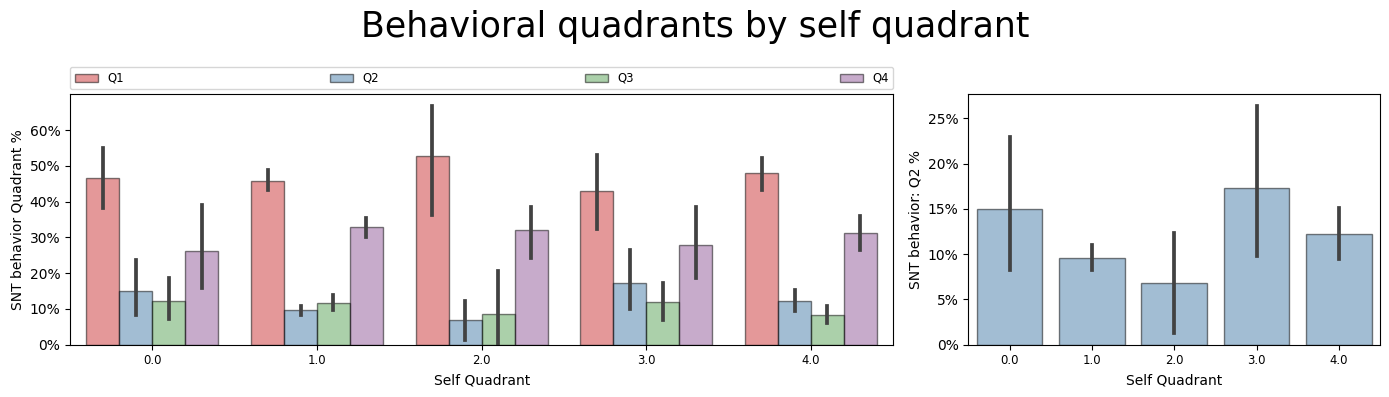

In [14]:
mask = np.isfinite(data['self_impact'])

#-------------------------------------------------------------------------------------
# self likability and self impact
#-------------------------------------------------------------------------------------

plt.figure(figsize=(6,4))
plt.hist2d(data['self_likability'][mask], data['self_impact'][mask], bins=20)
plt.colorbar()
plt.xlabel('Self Likability')
plt.ylabel('Self Impact')
# plt.ylim(-1, 1)
# plt.xlim(-1, 1)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

#-------------------------------------------------------------------------------------
# own quadrant defined in terms of self_likability, self_impact
#-------------------------------------------------------------------------------------

q_data_melted = data.melt(id_vars=[social_factor, 'self_quadrant'], 
                          value_vars=[c for c in data.columns if 'Q' in c], 
                          var_name='quadrant', value_name='%')

set1_colors = sns.color_palette('Set1', n_colors=9)
fig, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2,1]})
fig.suptitle('Behavioral quadrants by self quadrant', fontsize=25)
sns.barplot(ax=axs[0], x='self_quadrant', y='%', hue='quadrant', data=q_data_melted, 
            edgecolor='black', alpha=0.5, palette='Set1')
sns.barplot(ax=axs[1], x='self_quadrant', y='Q2_overlap', data=data, 
            edgecolor='black', alpha=0.5, color=set1_colors[1])

axs[0].set_title(' ')
axs[1].set_title(' ')
axs[0].set_xlabel('Self Quadrant')
axs[1].set_xlabel('Self Quadrant')
axs[0].set_ylabel('SNT behavior Quadrant %')
axs[1].set_ylabel('SNT behavior: Q2 %')
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in axs[0].get_yticks()])
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in axs[1].get_yticks()])
axs[0].tick_params(axis='x', labelsize='small')
axs[1].tick_params(axis='x', labelsize='small')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=['Q1', 'Q2', 'Q3', 'Q4'],
              loc='lower left', bbox_to_anchor=(0,1.02,1,0.2), fontsize='small',
              ncol=4, mode="expand", borderaxespad=0)
plt.tight_layout()

# Social factor correlates w/ real social network structure
- Social avoidance & POV distance correlated w/ SNI

,X,y,x,dof,adj_rsq,bic,aic,beta,se,95%_lb,95%_ub,t,p,p_left,p_right
1,Intercept + pov_2d_dist_mean_mean_z + demo_age...,sni_number_ppl_z,pov_2d_dist_mean_mean_z,232.0,0.029,820.44,738.99,-0.145,0.065,-0.273,-0.017,-2.226,0.027,0.013,0.987
1,Intercept + pov_2d_dist_mean_mean_z + demo_age...,sni_network_diversity_z,pov_2d_dist_mean_mean_z,232.0,0.028,820.83,739.38,-0.139,0.065,-0.267,-0.011,-2.142,0.033,0.017,0.983


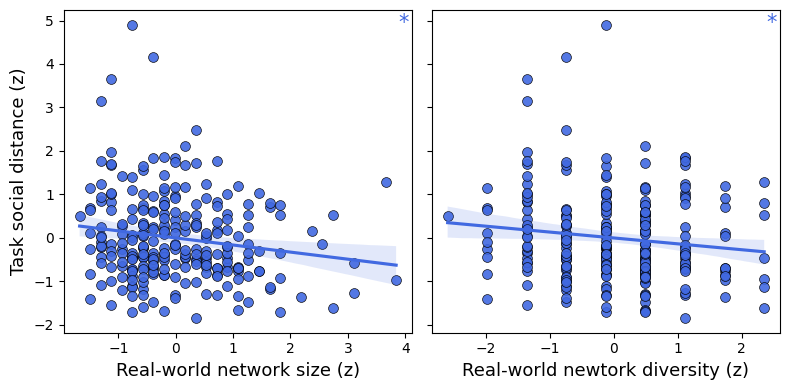

In [24]:
df = sample_dict['Validation']['data']
df['sni_number_ppl_z']        = scipy.stats.zscore(df['sni_number_ppl'])
df['sni_network_diversity_z'] = scipy.stats.zscore(df['sni_network_diversity'])
df['pov_2d_dist_mean_mean_z'] = scipy.stats.zscore(df['pov_2d_dist_mean_mean'])

sni   = {'network size': 'sni_number_ppl_z', 'newtork diversity': 'sni_network_diversity_z'}
other = {'Social distance': ['pov_2d_dist_mean_mean_z']}
        # 'Social Factor': [social_factor],
        # 'Mood Factor': [mood_factor],
        # 'Compulsive Factor': [compulsive_factor],
        #  'Affil + Power': ['affil_mean_mean', 'power_mean_mean'],
        #  'Likability + Impact': ['self_likability', 'self_impact']}
ols_res = []
for y, y_name in sni.items():
    for x, x_name in other.items():
        ols_df = run_ols(X=x_name, y=y_name, data=df, covariates=all_controls)[0]
        ols_res.append(ols_df[ols_df['x'].isin(x_name)])
display(pd.concat(ols_res))

#-------------------------------------------------------------------------------------------------
# plot
#-------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(1,2, figsize=(8, 4), sharey=True)
color = sample_colors[1]
# fig.suptitle('Social distance correlates with real-world social network structure', fontsize=title_fontsize)
for s, (sni_title, sni_var) in enumerate(sni.items()):
    ax = axs[s]
    sns.regplot(x=df[sni_var], y=df['pov_2d_dist_mean_mean_z'], color=color,
                scatter_kws={'alpha':0.9, 's':50, 'edgecolor': 'black', 'linewidth':0.5},
                ax=ax)
    if s == 0:
        ax.set_ylabel('Task social distance (z)', fontsize=label_fontsize)
    else:
        ax.set_ylabel('', fontsize=label_fontsize)
    ax.set_xlabel(f'Real-world {sni_title} (z)', fontsize=label_fontsize)

    ols_df = run_ols(X='pov_2d_dist_mean_mean_z', y=sni_var, data=df, covariates=demo_controls)[0]
    p = ols_df[ols_df['x']=='pov_2d_dist_mean_mean_z']['p'].values # treat these as fwer corrected
    plot_significance(ax, p, sig_level=4, x=0.96, y=0.99, dx=-0.0275, color=color, fontsize=title_fontsize)

plt.tight_layout()
# save_figure(fig, f'{fig_dir}/Fig6_Realworld-networks')

# What about real individual relationships?
can break down to: family, friends, work, religious/other

In [26]:
data_ = data[np.isfinite(data['dots_affil_relationship_mean'])]
data_.columns = [c.replace('dots_', 'dots') for c in data_.columns] 

relationship_cols = [c for c in data_.columns if 'relationship' in c and 'mean' not in c]
ratings_cols      = [c for c in relationship_cols if any(r in c for r in ['likability', 'impact', 'dots'])]

# long form
melted_df = pd.melt(data_, id_vars=[social_factor], value_vars=ratings_cols)

# likability & impact scale to -1 to 1
melted_df.loc[melted_df['variable'].str.contains('likability|impact'), 'value'] = (melted_df.loc[melted_df['variable'].str.contains('likability|impact'), 'value'] - 50) / 50

# clean up
melted_df['variable'] = melted_df['variable'].str.replace('workNonsupervision', 'workN')
melted_df['variable'] = melted_df['variable'].str.replace('workSupervision', 'workS')
melted_df[['relationship', 'dimension']] = melted_df['variable'].str.split('_', expand=True)[[0,2]]
melted_df.drop('variable', axis=1, inplace=True)
melted_df.rename(columns={'value': 'rating'}, inplace=True)
melted_df.dropna(subset=['rating'], inplace=True)

ratings_quadrant_cols = data[[c for c in data.columns if '_ratings_quadrant' in c]].apply(pd.Series.value_counts, axis=1).fillna(0)
dots_quadrant_counts  = data[[c for c in data.columns if '_dots_quadrant' in c]].apply(pd.Series.value_counts, axis=1).fillna(0)

### For most relationships, the dimension-specific ratings and dots track - except for power dimension w/ impact in  immediate family
- impact is probably being interpreted differently there: e.g., children def have a lrge impact on your goals but not bc they have 'power' per se

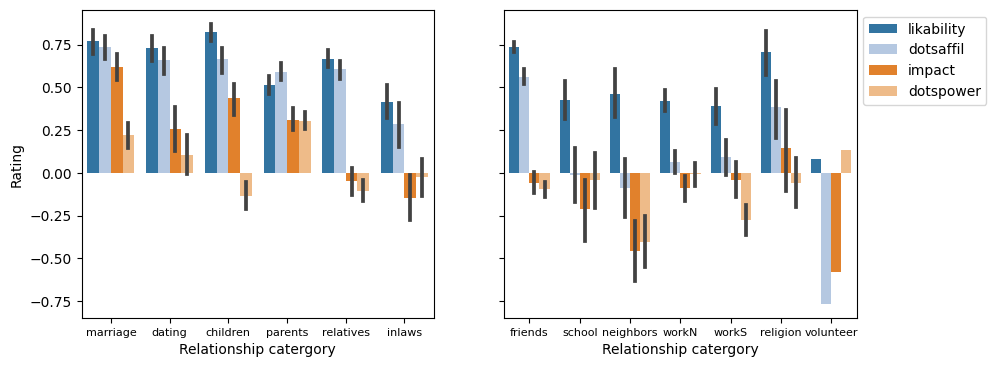

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.barplot(ax=axs[0], x='relationship', y='rating', hue='dimension', data=melted_df, 
            order=['marriage', 'dating', 'children', 'parents', 'relatives', 'inlaws'], 
            hue_order=['likability', 'dotsaffil', 'impact', 'dotspower'], palette=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].set(xlabel='Relationship catergory', ylabel='Rating')
plt.setp(axs[0].get_xticklabels(), fontsize=8)
axs[0].legend_.remove()

# same kind of plot but for the other relationship values
sns.barplot(ax=axs[1], x='relationship', y='rating', hue='dimension', data=melted_df,
            order=['friends', 'school', 'neighbors', 'workN', 'workS', 'religion', 'volunteer'],
            hue_order=['likability', 'dotsaffil', 'impact', 'dotspower'], palette=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(axs[1].get_xticklabels(), fontsize=8)
axs[1].set(xlabel='Relationship catergory', ylabel='')

plt.show()

### Ranking relationship categories: which kinds of relationships do people tend to rank as high in affiliation, power?

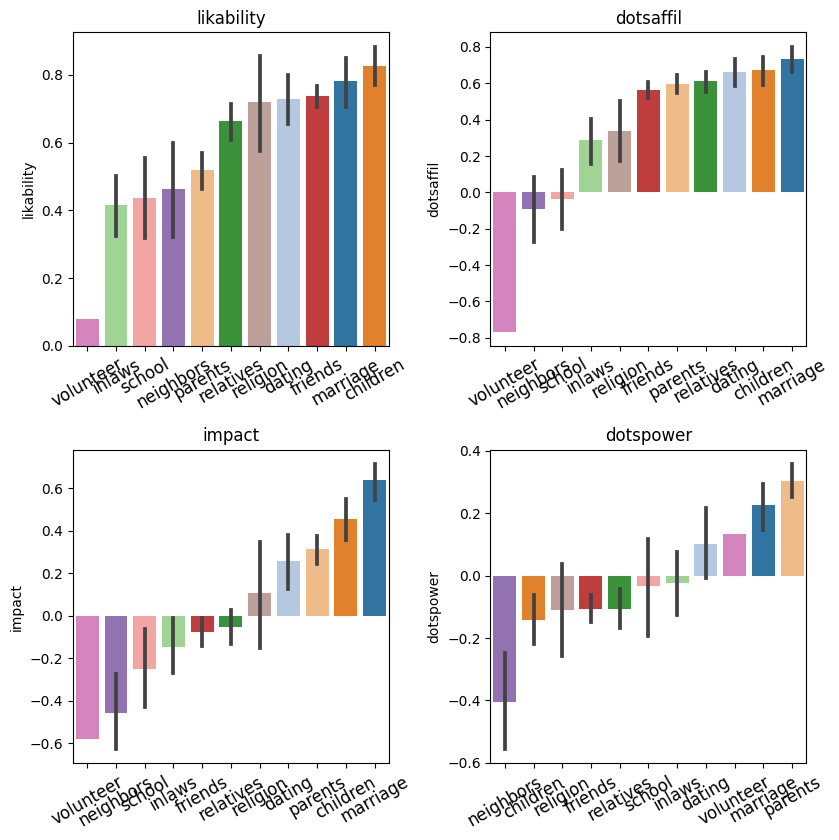

In [27]:
# assign each of the relationships a unique color
relationship_colors = {'marriage': '#1f77b4', 'dating': '#aec7e8', 'children': '#ff7f0e', 'parents': '#ffbb78', 
                       'relatives': '#2ca02c', 'inlaws': '#98df8a', 'friends': '#d62728', 
                       'school': '#ff9896', 'neighbors': '#9467bd', 'workN': '#c5b0d5', 
                       'workS': '#8c564b', 'religion': '#c49c94', 'volunteer': '#e377c2'}

# 2,2 barplot subplots
fig, axs = plt.subplots(2, 2, figsize=(8.5, 8.5))
for i, dim in enumerate(['likability', 'dotsaffil', 'impact', 'dotspower']):

    # sort the relationship by the average value on this dim
    sorted_relationships = melted_df[melted_df['dimension'] == dim].groupby('relationship')['rating'].mean().sort_values().index
    sorted_relationships = sorted_relationships[sorted_relationships != 'extraGroup1']

    # use relaitonship_colors to color the bars, ensuring that the order of the bars is the same as the order of the relationships
    sns.barplot(x='relationship', y='rating', data=melted_df[melted_df['dimension'] == dim], order=sorted_relationships, ax=axs[i//2, i%2], palette=[relationship_colors[r] for r in sorted_relationships])
    axs[i//2, i%2].set(xlabel='', ylabel=dim, title=dim)
    plt.setp(axs[i//2, i%2].get_xticklabels(), fontsize=12, rotation=30)

plt.tight_layout()


### Own likability/impact correlates w/ real-world relationship likability/impact
pos. correlations across all 4, but strongest w/in dimension

In [29]:
# fig, axs = plt.subplots(2, 2, figsize=(6,6))
# for i, self_col in enumerate(['self_likability', 'self_impact']):
#     for j, other_col in enumerate(['likability_relationship_mean', 'impact_relationship_mean']):
#         sns.regplot(x=self_col, y=other_col, data=data, ax=axs[i,j], color='#1f77b4',
#                     scatter_kws={'alpha': 1, 'edgecolor': 'black', 'linewidth': 1, 's': 50})
#         axs[i,j].set(xlabel=self_col, ylabel=other_col)
# plt.tight_layout()

### Most real-world relationships are in quadrants 1 & 4, relatively equally (like task) -- but highly social avoidant people have more Q2 overlap in relationships
- likely driven by relationships that are less of choice, have less familiarity with: e.g., work jobs etc - CHECK

In [30]:
data_     = data[np.isfinite(data['dots_affil_relationship_mean'])]
quad_cols = [c for c in list_cols('_tendency') if ('quadrants' not in c) & ('relative' in c)]
melted_df = pd.melt(data_, id_vars=['sub_id', social_factor, 'self_quadrant_relative'], 
                    value_vars=quad_cols, value_name='value', var_name='measure')

melted_df['measure'] = melted_df['measure'].str.replace('_tendency_relative', '')
melted_df['measure'] = melted_df['measure'].str.replace('quadrant', '')
melted_df = melted_df[melted_df['self_quadrant_relative'] != 0]
melted_df[['type', 'measure', 'other_quadrant']] = melted_df['measure'].str.split('_', expand=True)
# melted_df.head(10)

In [31]:
def sample_mean_center(values):
    return values - np.nanmean(values, axis=0)
pal = sns.color_palette(['#3333cc', '#ff6666', '#ff0000', '#6600cc'])

data_ = data[np.isfinite(data['dots_affil_relationship_mean'])]

# self
factor_scores = data_[social_factor].values
# factor_scores = np.digitize(factor_scores, 5, right=True)
self_xy   = (data_[['self_likability', 'self_impact']].values- 50) / 50
self_quad = data_['self_quadrant_relative'].values

# task 
task_behav_xy  = data_[['affil_mean_mean','power_mean_mean']].values
task_rating_xy = (data_[['likability_mean','impact_mean']].values - 50) / 50
task_dots_xy   = data_[['dots_affil_mean','dots_power_mean']].values

# relationships
rel_rating_xy = (data_[['likability_relationship_mean', 'impact_relationship_mean']].values - 50) / 50
fam_rating_xy = (data_[['likability_family_mean', 'impact_family_mean']].values - 50) / 50
nonfam_rating_xy = (data_[['likability_nonfamily_mean', 'impact_nonfamily_mean']].values - 50) / 50

rel_dots_xy    = data_[['dots_affil_relationship_mean', 'dots_power_relationship_mean']].values
fam_dots_xy    = data_[['dots_affil_family_mean', 'dots_power_family_mean']].values
nonfam_dots_xy = data_[['dots_affil_nonfamily_mean', 'dots_power_nonfamily_mean']].values

plot_xys = {'Task behavior (self-oriented)': task_behav_xy, 'Task ratings': task_rating_xy, 'Task dots': task_dots_xy,
            'Family ratings': fam_rating_xy, 'Family dots': fam_dots_xy,
            'Non-family ratings': nonfam_rating_xy, 'Non-family dots': nonfam_dots_xy}

fig, axs = plt.subplots(1, len(plot_xys), figsize=(5*len(plot_xys), 5))
for i, (title, xy) in enumerate(plot_xys.items()):
    ax = axs[i]
    xy = np.hstack([xy, self_quad[:,np.newaxis]])
    sns.scatterplot(x=xy[:,0], y=xy[:,1], hue=xy[:,2], 
                    palette=pal, s=75, alpha=.5, ax=ax)
    plot_social_space(ax)
    if i > 0:  ax.set_ylabel('')
    if i != 2: ax.set_xlabel('')
    ax.set_title(title, fontsize=title_fontsize)
    # add a title to legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Self quadrant', fontsize=legend_label_fontsize, title_fontsize=legend_title_fontsize)

KeyError: "None of [Index(['likability_relationship_mean', 'impact_relationship_mean'], dtype='object')] are in the [columns]"

KeyError: 'Q2_overlap'

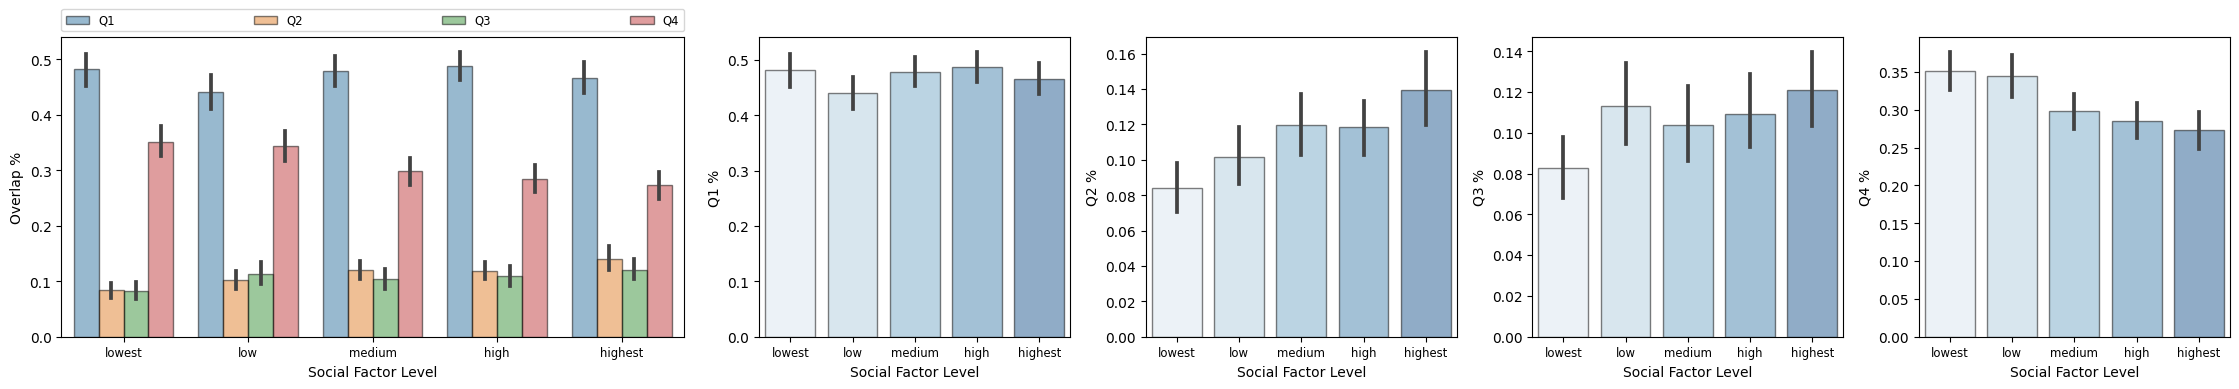

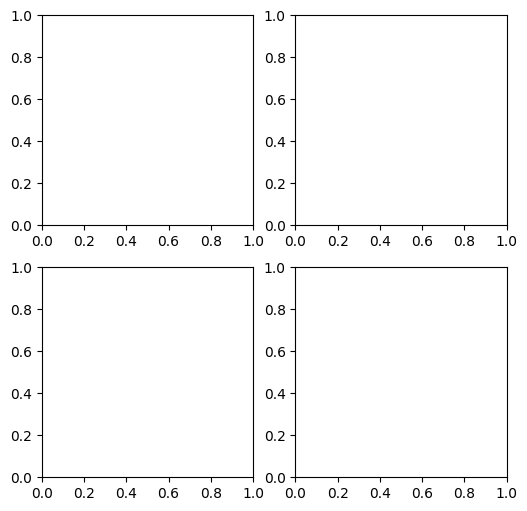

In [32]:
#-----------------------------------------------------------------------------------------------
# plot the quadrants by diff. levels of social factor
#-----------------------------------------------------------------------------------------------

q_names = ['Q1_overlap', 'Q2_overlap', 'Q3_overlap', 'Q4_overlap']
factor_splits = ['lowest', 'low', 'medium', 'high', 'highest'] # split into 5 groups
data[f'{social_factor}_split'] = pd.qcut(data[social_factor], len(factor_splits), labels=factor_splits)
ratings_quadrant_melted = pd.melt(data, id_vars=[f'{social_factor}_split'], value_vars=q_names)

fig, axs = plt.subplots(1, 1+len(q_names), figsize=(4.5*(1+len(q_names)), 4), gridspec_kw={'width_ratios': [2] + [1]*len(q_names)})
sns.barplot(ax=axs[0], x=f'{social_factor}_split', y='value', hue='variable', data=ratings_quadrant_melted, edgecolor='black', alpha=0.5)
for q, q_name in enumerate(q_names):
    sns.barplot(ax=axs[q+1], x=f'{social_factor}_split', y=q_name, data=data, palette='Blues', edgecolor='black', alpha=0.5)
    axs[q+1].set_ylabel(f'Q{q+1} %')

axs[0].set_ylabel('Overlap %')
for ax in axs:
    ax.set_title(' ')
    ax.tick_params(axis='x', labelsize='small')
    ax.set_xlabel('Social Factor Level')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=['Q1', 'Q2', 'Q3', 'Q4'],
              loc='lower left', bbox_to_anchor=(0,1.02,1,0.2), fontsize='small',
              ncol=4, mode="expand", borderaxespad=0)
plt.tight_layout()

#-----------------------------------------------------------------------------------------------
# plot the quadrants correlations
#-----------------------------------------------------------------------------------------------

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
for i, quadrant in enumerate(['Q2_overlap', 'Q1_overlap', 'Q3_overlap', 'Q4_overlap']):
    for s, sample in enumerate(samples[:2]):
        df = sample_dict[sample]
        sns.regplot(x=quadrant, y=social_factor, data=df, 
                    ax=axs[i//2, i%2], color=sample_colors[s], 
                    scatter_kws={'alpha':.5, 's':20})
        # add_sig_stars(quadrant, social_factor, df, demo_controls, 
        #               ax=axs[i//2, i%2], color=sample_colors[s])
    axs[i//2, i%2].set_xlabel(quadrant)
    if i%2 == 0: axs[i//2, i%2].set_ylabel('Social Factor Dimension')
    else:        axs[i//2, i%2].set_ylabel('')
plt.tight_layout()


In [33]:
data_ = data[np.isfinite(data['dots_affil_relationship_mean'])]

#-----------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0,0].hist2d(x=data_['dots_affil_relationship_mean'], y=data_['dots_power_relationship_mean'],  bins=10)
axs[0,0].set(xlabel='Affiliation', ylabel='Power', title='2D real-world relationship placement')

sns.barplot(x=dots_quadrant_counts.columns, y=dots_quadrant_counts.mean(), ax=axs[0,1], edgecolor='black', alpha=0.5)
axs[0,1].set(xlabel='Quadrant', ylabel='Mean count', title='Mean count of each quadrant')

axs[1,0].hist2d(x=data_['likability_relationship_mean'], y=data_['impact_relationship_mean'],  bins=10)
axs[1,0].set(xlabel='Likability', ylabel='Impact', title='2D real-world relationship ratings')

# sns.barplot(x=ratings_quadrant_cols.columns, y=ratings_quadrant_cols.mean(), ax=axs[1,1], edgecolor='black', alpha=0.5)
# axs[1,1].set(xlabel='Quadrant', ylabel='Mean count', title='Mean count of each quadrant')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------
# get percentage of each quadrrant for realworld relationships
fam_cols = ['children', 'parents', 'relatives', 'inlaws', 'marriage', 'dating']
dots_qcols = [c for c in data.columns if '_dots_quadrant' in c]

# NON FAMILY: exclude dots_qcols that have any of fam_cols in them
dots_qcols = [c for c in dots_qcols if not any([f in c for f in fam_cols])]
dots_q = data[dots_qcols].apply(pd.Series.value_counts, axis=1).fillna(0).apply(lambda x: x/x.sum(), axis=1)
dots_q.columns = [f'q_{str(int(c))}_perc' for c in dots_q.columns]
for c in dots_q.columns:
    if c not in data.columns:
        data[c] = dots_q[c]

#-----------------------------------------------------------
# get social factor split
split = 4
data[f'{social_factor}_split'] = pd.qcut(data[social_factor], 4, labels=[str(s+1) for s in range(split)])

#-----------------------------------------------------------
# melt 
dots_quadrant_melted = pd.melt(data, id_vars=[social_factor, 'self_quadrant'], 
                                value_vars=dots_q.columns, var_name='quadrant', value_name='%')

# #-----------------------------------------------------------
# # make 2 subplots

# fig, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2,1]})
# fig.suptitle('Relationships quadrants by social factor splits', fontsize=25)
# sns.barplot(ax=axs[0], x='factor_social_min_split', y='value', hue='variable', data=dots_quadrant_melted, edgecolor='black', alpha=0.5)
# sns.barplot(ax=axs[1], x='factor_social_min_split', y='quadrant_2_perc', data=data, palette='Blues', edgecolor='black', alpha=0.5)

# axs[0].set_title(' ')
# axs[1].set_title(' ')
# axs[0].set_xlabel('Social Factor')
# axs[1].set_xlabel('Social Factor')
# axs[0].set_ylabel('Overlap')
# axs[1].set_ylabel('Q2 Overlap')
# axs[0].tick_params(axis='x', labelsize='small')
# axs[1].tick_params(axis='x', labelsize='small')
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles=handles, labels=['Q1', 'Q2', 'Q3', 'Q4'],
#               loc='lower left', bbox_to_anchor=(0,1.02,1,0.2), fontsize='small',
#               ncol=4, mode="expand", borderaxespad=0)

# plt.tight_layout()

# #-----------------------------------------------------------
# # plot same way for the self quadrant

# set1_colors = sns.color_palette('Set1', n_colors=9)

# fig, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2,1]})
# fig.suptitle('Relationship quadrants by self quadrant', fontsize=25)
# sns.barplot(ax=axs[0], x='self_quadrant',  y='%', hue='quadrant', data=dots_quadrant_melted, edgecolor='black', alpha=0.5, palette='Set1')
# sns.barplot(ax=axs[1], x='self_quadrant', y='q_2_perc', data=data, edgecolor='black', alpha=0.5, color=set1_colors[1]) #palette='Set1')
# # sns.stripplot(ax=axs[1], x='self_quadrant', y='quadrant_2_perc', data=data, color=set1_colors[1], alpha=0.5, edgecolor='black', linewidth=0.5, size=8)

# axs[0].set_title(' ')
# axs[1].set_title(' ')
# axs[0].set_xlabel('Self Q')
# axs[1].set_xlabel('Self Q')
# axs[0].set_ylabel('Other Q %')
# axs[1].set_ylabel('Q2 %')
# axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in axs[0].get_yticks()])
# axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in axs[1].get_yticks()])
# axs[0].tick_params(axis='x', labelsize='small')
# axs[1].tick_params(axis='x', labelsize='small')
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles=handles, labels=['Q1', 'Q2', 'Q3', 'Q4'],
#               loc='lower left', bbox_to_anchor=(0,1.02,1,0.2), fontsize='small',
#               ncol=4, mode="expand", borderaxespad=0)

# plt.tight_layout()

KeyError: 'likability_relationship_mean'

Error in callback <function flush_figures at 0x2be976670> (for post_execute):


KeyboardInterrupt: 